## **Introduction**

* **The problem:** predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events.This is a binary classification task. Given a data sample (information about the dating session), we are going to predict the probability (0-1, float) that the dating session will lead to a successful match.

* **The inputs:**  The input data we're dealing with is a profile of each participant in the session.


* **The output:** the probability (0-1) that the dating session will lead to a successful match.


**The data mining function:** Binary Classification.

**Challenges**
* Missing values handling as there are very large number of missings
* data imbalance
* select best processing method for filling the missing
* select best model to deploy
* many parameter to choose from them for models


**Impact**

The impact is to Understand the features that contribute to successful matches, Furthermore, this would provide an opportunity to make useful recommendations for future speed dating events.



**Ideal solution**

An ideal solution will effectively creating a dataset-representative missing value replacement technique and optimising hyperparameters to make the most correct estimates possible.


**What is the experimental protocol used and how was it carried out? & What preprocessing steps are used?**


 * For missing values replacement, different methods used according to features types. For numeric features mean and median used and for categorical features missing values replaced with constant value missing then scaling applied on the data

* On the preprocessed dataset, the classifier is utilised to make predictions. classifiers used Random Forest and XGboost

* parameter tuning methods used Random search , grid search and bayesian search


 #### **Read Data and show it**

In [1]:
pip install scikit-optimize

In [60]:
# import necessary libraries
import pandas as pd
import numpy as np

# Visualiztion Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Models development Libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# Models Evaluation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.feature_selection import RFE
from sklearn import tree

In [2]:
# read train , test and sample submission data
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

### **`Data Exploration and visualization`**

In [3]:
train_df

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,0,1,2,9,20,2,2.0,18,1,214.0,...,12.0,12.0,9.0,12.0,NaN,NaN,NaN,NaN,NaN,3390
5905,1,24,2,9,20,19,15.0,5,6,199.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4130
5906,0,13,2,11,21,5,5.0,3,18,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1178
5907,1,10,2,7,16,6,14.0,9,10,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5016


In [4]:
# display some info about train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [5]:
# show train dataset columns names
print(train_df.columns.tolist())

['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 

In [6]:
# print shape of train and test dataframes
print(train_df.shape)
print(test_df.shape)

(5909, 192)
(2469, 191)


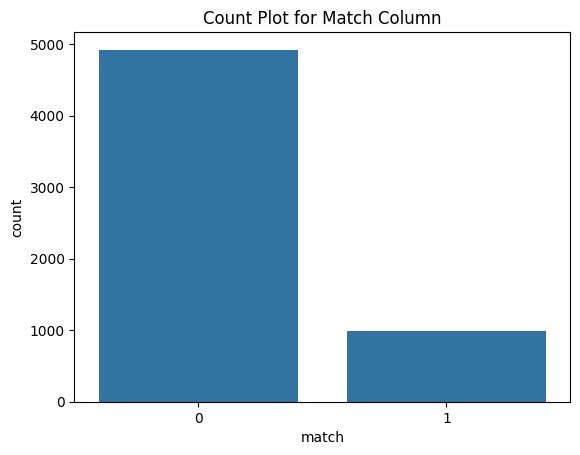

In [10]:
# distribution of target attribute
sns.countplot(x= train_df['match'])
plt.title('Count Plot for Match Column')
plt.show()


**Note from plot above** highly imbalanced in favour of "no match" (~5:1 ratio)


In [11]:
# set Id as index column
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)
test_df.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
id,,,,,,,,,,,,,,,,,,,,,
934,0,5,2,2,16,3,NaN,13,13,52.0,...,5.0,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN
6539,0,33,2,14,18,6,6.0,4,8,368.0,...,6.0,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0
6757,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2275,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1052,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# print shape of train and test dataframes
print(train_df.shape)
print(test_df.shape)

(5909, 191)
(2469, 190)


In [13]:
# Summary statistics for numerical features
train_data_describe = train_df.describe()
train_data_describe

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,...,7.241797,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711
std,0.500014,10.947542,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,...,1.593787,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.00000,22.000000,552.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**Check for null values**

In [14]:
# train dataset null values count
pd.set_option('display.max_rows', None)
train_df.isnull().sum().sort_values(ascending=False)

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
shar7_2     4505
attr7_2     4498
intel7_2    4498
fun7_2      4498
shar7_3     4496
attr7_3     4496
sinc7_3     4496
intel7_3    4496
fun7_3      4496
amb7_3      4496
amb5_3      4496
shar2_3     4496
intel5_3    4496
attr5_3     4496
fun5_3      4496
sinc5_3     4496
amb2_3      3838
fun2_3      3838
intel2_3    3838
attr4_3     3838
sinc2_3     3838
attr2_3     3838
intel4_3    3838
fun4_3      3838
amb4_3      3838
shar4_3     3838
sinc4_3     3838
mn_sat      3674
tuition     3365
date_3      3105
attr1_3     3105
intel3_3    3105
fun3_3      3105
you_call    3105
them_cal    3105
fun1_3      3105
amb3_3      3105
sinc1_3     3105
intel1_3    3105
amb1_3      3105
shar1_3     3105
sinc3_3     3105
attr3_3     3105
amb3_s      3069
fun3_s      3069
intel3_s    3069
sinc3_s     3069
attr3_s     3069
intel1_s    2994
attr1_s     2994
sinc1_s     2994
shar1_s     2994
amb1_s      2994
fun1_s      29

In [15]:
# test dataset null values count
pd.set_option('display.max_rows', None)
test_df.isnull().sum().sort_values(ascending=False)

num_in_3    2261
numdat_3    2033
expnum      1951
sinc7_2     1904
amb7_2      1904
shar7_2     1899
attr7_2     1896
fun7_2      1896
intel7_2    1896
attr7_3     1866
sinc7_3     1866
intel7_3    1866
fun7_3      1866
amb7_3      1866
shar7_3     1866
amb5_3      1866
shar2_3     1866
fun5_3      1866
intel5_3    1866
sinc5_3     1866
attr5_3     1866
sinc2_3     1581
attr2_3     1581
attr4_3     1581
amb4_3      1581
amb2_3      1581
fun2_3      1581
sinc4_3     1581
intel4_3    1581
fun4_3      1581
intel2_3    1581
shar4_3     1581
mn_sat      1571
tuition     1430
sinc3_s     1309
intel3_s    1309
fun3_s      1309
attr3_s     1309
amb3_s      1309
amb3_3      1299
shar1_3     1299
attr3_3     1299
sinc3_3     1299
you_call    1299
them_cal    1299
fun3_3      1299
date_3      1299
amb1_3      1299
attr1_3     1299
sinc1_3     1299
intel1_3    1299
fun1_3      1299
intel3_3    1299
intel1_s    1288
fun1_s      1288
shar1_s     1288
sinc1_s     1288
amb1_s      1288
attr1_s     12

**From the above results** : there are huge number of null values we need to handle it

Such as:      
* num_in_3 has 5449 null value
* numdat_3 has 4849 null value
* expnum has 4627 null value
* amb7_2 has 4519 null value
* shar7_3 has 4496 null value
* fun7_2 has 4498 null value
* attr7_3 has 4496 null value

and more thus Let's check this columns to determine what to do with these null values columns

In [16]:
# display percentage of number of null values in each columns regrading full records as %

null_percentage = train_df.isnull().sum() / len(train_df) * 100
print(null_percentage.sort_values(ascending=False))


num_in_3    92.215265
numdat_3    82.061262
expnum      78.304282
amb7_2      76.476561
sinc7_2     76.476561
shar7_2     76.239634
attr7_2     76.121171
intel7_2    76.121171
fun7_2      76.121171
shar7_3     76.087324
attr7_3     76.087324
sinc7_3     76.087324
intel7_3    76.087324
fun7_3      76.087324
amb7_3      76.087324
amb5_3      76.087324
shar2_3     76.087324
intel5_3    76.087324
attr5_3     76.087324
fun5_3      76.087324
sinc5_3     76.087324
amb2_3      64.951768
fun2_3      64.951768
intel2_3    64.951768
attr4_3     64.951768
sinc2_3     64.951768
attr2_3     64.951768
intel4_3    64.951768
fun4_3      64.951768
amb4_3      64.951768
shar4_3     64.951768
sinc4_3     64.951768
mn_sat      62.176341
tuition     56.947030
date_3      52.546962
attr1_3     52.546962
intel3_3    52.546962
fun3_3      52.546962
you_call    52.546962
them_cal    52.546962
fun1_3      52.546962
amb3_3      52.546962
sinc1_3     52.546962
intel1_3    52.546962
amb1_3      52.546962
shar1_3   

In [17]:
# get columns with null values percentage greater than 50 %
columns_to_drop = train_df.columns[train_df.isnull().sum() / len(train_df) > 0.5]
columns_to_drop

Index(['mn_sat', 'tuition', 'expnum', 'attr1_s', 'sinc1_s', 'intel1_s',
       'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s',
       'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2',
       'amb7_2', 'shar7_2', 'you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3',
       'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3',
       'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3',
       'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3',
       'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
       'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object')

In [18]:
# drop columns with null values number percentages greater than 50%
train_df = train_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

In [19]:
# print shape of train and test dataframes after dropping dataframes
print(train_df.shape)
print(test_df.shape)

(5909, 132)
(2469, 131)


Text(0, 0.5, 'Frequency.')

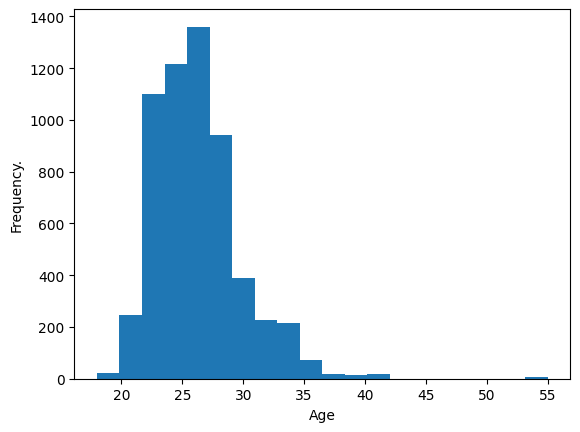

In [20]:
#let us visualize some of data
age = train_df[np.isfinite(train_df['age'])]['age']
plt.hist(age.values,bins=20,)
plt.xlabel('Age')
plt.ylabel('Frequency.')

Text(0, 0.5, 'Frequency.')

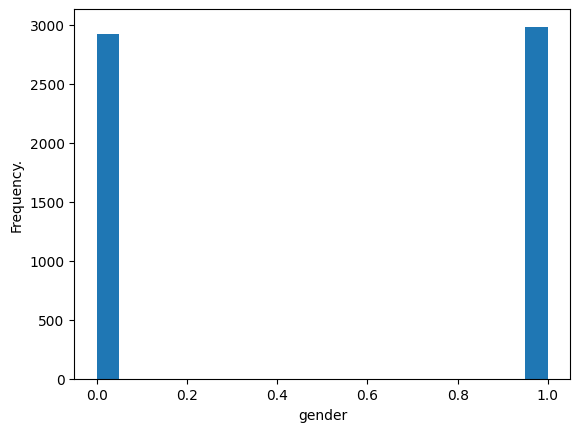

In [61]:
#let us visualize some of data
age = train_df[np.isfinite(train_df['gender'])]['gender']
plt.hist(age.values,bins=20,)
plt.xlabel('gender')
plt.ylabel('Frequency.')

**Data preparation for model deployment**

In [21]:
# divide data into xtrain and ytrain to prepare it for training
xtrain = train_df.drop('match', axis=1)
ytrain = train_df['match']

In [22]:
xtrain['income']

id
2583           NaN
6830           NaN
4840           NaN
5508     45,300.00
4828     46,138.00
7126           NaN
3774     55,080.00
4303           NaN
3859           NaN
7049     36,594.00
1944     39,394.00
2854     16,908.00
5041           NaN
7403           NaN
971            NaN
4232           NaN
3489           NaN
5977           NaN
1739     49,642.00
7076     23,361.00
6443           NaN
6931     46,800.00
7418           NaN
6921     40,749.00
2218     48,944.00
899      63,351.00
1611     75,347.00
5477           NaN
4259           NaN
2388           NaN
3417     42,640.00
931            NaN
6991     48,944.00
271      57,513.00
626      39,919.00
7539     32,649.00
4475     32,508.00
5766    109,031.00
476      37,881.00
4322           NaN
7836     37,754.00
13             NaN
430      28,989.00
6626     55,080.00
7954     28,759.00
4410           NaN
611            NaN
3971           NaN
6285     55,080.00
5502     32,649.00
5666           NaN
1432           NaN
836      

**Income column** : we notice that column datatype is object while it contains numeric columns but it's datatype is an object because it contains comma this let's replace it and define col as numeric float

In [23]:
# Replace commas and convert the 'income' column to floats
xtrain['income'] = xtrain['income'].str.replace(',', '').astype(float)
test_df['income'] = test_df['income'].str.replace(',', '').astype(float)

**Split features into numeric and categorical features**

In [24]:
features_numeric = list(xtrain.select_dtypes(include=['float64'])) # get list of all numeric attributes
features_categorical = list(xtrain.select_dtypes(include=['object'])) # get list of all categorical attributes

In [25]:
features_numeric_tst = list(test_df.select_dtypes(include=['float64'])) # get list of all numeric attributes
features_categorical_tst = list(test_df.select_dtypes(include=['object'])) # get list of all categorical attributes

In [26]:
print(features_categorical) # printing the list of categorical features
print(features_categorical_tst) # printing the list of categorical features

['field', 'undergra', 'from', 'zipcode', 'career']
['field', 'undergra', 'from', 'zipcode', 'career']


In [27]:
xtrain[features_categorical]=xtrain[features_categorical].astype('category')
test_df[features_categorical_tst]=test_df[features_categorical_tst].astype('category')

In [28]:
xtrain[features_categorical].dtypes

field       category
undergra    category
from        category
zipcode     category
career      category
dtype: object

**Preprocessing Pipeline** to fill missing values of categorical and numeric features

In [29]:
np.random.seed(0) # setting the random seed to yield repeatable results

# transformer used to impute missing numeric values
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')), # impute missing values with the feature median
        ('scaler', StandardScaler())] # features scaling
)

# transformer used to impute missing categorical values
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # replace missing values with const value 'missing'
        ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding for features
    ]
)

# combines transformers pipelines into one transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric), # numeric transformer to numeric features
        ('cat', transformer_categorical, features_categorical) #categorical transformer to numeric features
    ]
)


**Trial 1 Random Forest Model with Grid Search**

In [30]:
# Random forest classifier
Rf = RandomForestClassifier()

In [31]:
# complete pipeline for a random forest classifier
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor), # preprocessing transformer
        # initialize random forest classifier
        ('my_classifier', Rf)
    ]
)

In [32]:
# parameter grid used for GridSearch, hyperparameters
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','median'],
    'my_classifier__n_estimators': [100, 150, 250, 400],
    'my_classifier__max_depth':[10, 20, 30]
}

# exhaustive search over parameter grid using the complete pipeline for random forest, scored using ROC AUC
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2, # 3 validation folds, 2 jobs run in parallel
    scoring='roc_auc')

grid_search.fit(xtrain, ytrain) # fit with all parameter sets

print('best score {}'.format(grid_search.best_score_)) # best score from grid search
print('best score {}'.format(grid_search.best_params_)) # best parameter set from grid search

Fitting 3 folds for each of 24 candidates, totalling 72 fits
best score 0.8530158870787402
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 150, 'preprocessor__num__imputer__strategy': 'mean'}


In [33]:
# calculate predicted probability
ypred1= grid_search.predict_proba(test_df)
ypred1

array([[0.86652679, 0.13347321],
       [0.77091083, 0.22908917],
       [0.7981634 , 0.2018366 ],
       ...,
       [0.92336192, 0.07663808],
       [0.8998943 , 0.1001057 ],
       [0.9161523 , 0.0838477 ]])

In [34]:
# submission the file to try our model on test data on kaggle
id = test_df.index
match_pred = ypred1[:,1]
submission_1 = pd.DataFrame({'ID': id, 'match': match_pred})
submission_1.to_csv('submission_1.csv', index=False)
print("Submission_1 was saved successfully")
submission_1

Submission_1 was saved successfully


,ID,match
0,934,0.133473
1,6539,0.229089
2,6757,0.201837
3,2275,0.095267
4,1052,0.160426
5,2696,0.174025
6,3007,0.124166
7,2156,0.246924
8,8273,0.218412
9,3385,0.161686


**Trial 2 Random Forest Model with Random Search**
Expected higher accuracy and more optimization

In [35]:
# parameter grid used for randomseach ,
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','median'],
    'my_classifier__n_estimators': [100, 150, 250, 400],
    'my_classifier__max_depth':[10, 20, 30]
}

#use random search to find optimal hyperparameters
random_search_1 = RandomizedSearchCV(
    full_pipline, param_grid, cv=4, verbose=1, n_jobs=2,
    # number of random trials
    n_iter=20,
    scoring='roc_auc')

random_search_1.fit(xtrain, ytrain)

print('best score {}'.format(random_search_1.best_score_))
print('best score {}'.format(random_search_1.best_params_))

Fitting 4 folds for each of 20 candidates, totalling 80 fits
best score 0.8558258632828551
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 400, 'my_classifier__max_depth': 10}


**observation :** accuracy improves but a little

In [36]:
# calculate predicted probability
ypred2= random_search_1.predict_proba(test_df)
ypred2

array([[0.87486251, 0.12513749],
       [0.76237746, 0.23762254],
       [0.78225778, 0.21774222],
       ...,
       [0.89511412, 0.10488588],
       [0.87942592, 0.12057408],
       [0.90793143, 0.09206857]])

In [40]:
# submission the file to try our model on test data on kaggle
id = test_df.index
match_pred2 = ypred2[:,1]
submission_2 = pd.DataFrame({'ID': id, 'match': match_pred2})
submission_2.to_csv('submission_2.csv', index=False)
print("Submission_2 was saved successfully")
submission_2

Submission_2 was saved successfully


,ID,match
0,934,0.137528
1,6539,0.229402
2,6757,0.215408
3,2275,0.077980
4,1052,0.131918
5,2696,0.173696
6,3007,0.129320
7,2156,0.220825
8,8273,0.250056
9,3385,0.162616


**Trial 3 Random Forest Model with bayesian Search**

In [37]:
# parameter grid used for bayesian Search
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','median'],
    'my_classifier__n_estimators': [100, 150, 250, 400],
    'my_classifier__max_depth':[10, 20, 30]
}


#use bayesian search to find optimal hyperparameters
bayesian_search = BayesSearchCV(full_pipline, param_grid, cv=4, n_iter=25, verbose=3, n_jobs=2, scoring='roc_auc')

bayesian_search.fit(xtrain, ytrain)

print('best score {}'.format(bayesian_search.best_score_))
print('best score {}'.format(bayesian_search.best_params_))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 150, 'mean'] before, using random point [30, 100, 'mean']
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 150, 'mean'] before, using random point [10, 400, 'median']
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 150, 'mean'] before, using random point [20, 250, 'median']
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 150, 'mean'] before, using random point [10, 400, 'mean']
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 150, 'mean'] before, using random point [20, 150, 'median']
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 250, 'mean'] before, using random point [20, 400, 'median']
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 150, 'mean'] before, using random point [20, 150, 'median']
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
best score 0.8558979534244904
best score OrderedDict([('my_classifier__max_depth', 10), ('my_classifier__n_estimators', 250), ('preprocessor__num__imputer__strategy', 'mean')])


**obervation:** although in this trial i increased the number of iteration but accuracy doesn't affect

In [51]:
ypred3= bayesian_search.predict_proba(test_df)
ypred3

array([[0.89411363, 0.10588637],
       [0.75913665, 0.24086335],
       [0.7933725 , 0.2066275 ],
       ...,
       [0.92149352, 0.07850648],
       [0.88354895, 0.11645105],
       [0.9016119 , 0.0983881 ]])

In [52]:
# submission the file to try our model on test data on kaggle
id = test_df.index
match_pred3 = ypred3[:,1]
submission_3 = pd.DataFrame({'ID': id, 'match': match_pred3})
submission_3.to_csv('submission_3.csv', index=False)
print("Submission_3 was saved successfully")
submission_3

Submission_3 was saved successfully


,ID,match
0,934,0.105886
1,6539,0.240863
2,6757,0.206627
3,2275,0.085890
4,1052,0.136172
5,2696,0.157100
6,3007,0.127456
7,2156,0.255446
8,8273,0.215090
9,3385,0.200836


**Trial 4 Xgboost Model with grid Search**
Expected : while i changed the model to an ensemble learning model i ecpect high inrease in accurracy

In [40]:
xgb= XGBClassifier (scale_pos_weight =1,
colsample_bytree = 0.4,
learning_rate= 0.03,
max_depth = 10,
n_estimators = 300,
objective='binary:logistic',
reg_alpha=0.3)

In [42]:
# complete pipeline for a xgboost classifier
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor), #  preprocessing transformer
        # initialize xgboost classifier
        ('my_classifier', xgb)
    ]
)

In [43]:
# parameter grid used for GridSearch
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
     'my_classifier__n_estimators': [20, 30,40],
     'my_classifier__max_depth':[10,15, 20],
     'my_classifier__learning_rate':[0.01, 0.02,0.03]

}


# exhaustive search over parameter grid using the complete pipeline for random forest, scored using ROC AUC
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2, # 3 validation folds, 2 jobs run in parallel
    scoring='roc_auc')

grid_search.fit(xtrain, ytrain) # run fit with all parameter sets (exhaustive since we're using grid search)

print('best score {}'.format(grid_search.best_score_)) # best score from grid search
print('best score {}'.format(grid_search.best_params_)) # best parameter set from grid search

Fitting 3 folds for each of 27 candidates, totalling 81 fits
best score 0.8659095241165864
best score {'my_classifier__learning_rate': 0.03, 'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [44]:
ypred4= grid_search.predict_proba(test_df)
ypred4

array([[0.8507104 , 0.14928961],
       [0.7278426 , 0.27215737],
       [0.7903268 , 0.20967323],
       ...,
       [0.8939312 , 0.10606879],
       [0.90488034, 0.09511965],
       [0.91555935, 0.08444063]], dtype=float32)

In [55]:
# submission the file to try our model on test data on kaggle
id = test_df.index
match_pred4 = ypred4[:,1]
submission_4 = pd.DataFrame({'ID': id, 'match': match_pred4})
submission_4.to_csv('submission_4.csv', index=False)
print("Submission_4 was saved successfully")
submission_4

Submission_4 was saved successfully


,ID,match
0,934,0.149290
1,6539,0.272157
2,6757,0.209673
3,2275,0.100402
4,1052,0.150809
5,2696,0.205927
6,3007,0.164342
7,2156,0.220527
8,8273,0.221342
9,3385,0.177991


**observation**  as expected accuracy increased

**Trial 5 Xgboost Model with random Search**

In [46]:
# parameter grid used for Random search
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
     'my_classifier__n_estimators': [20, 30,40],
     'my_classifier__max_depth':[10,15, 20],
     'my_classifier__learning_rate':[0.01, 0.02,0.03]

}

random_search_2 = RandomizedSearchCV(
    full_pipline, param_grid, cv=4, verbose=1, n_jobs=2,
    # number of random trials
    n_iter=20,
    scoring='roc_auc')

random_search_2.fit(xtrain, ytrain)


print('best score {}'.format(random_search_2.best_score_)) # best score from grid search
print('best score {}'.format(random_search_2.best_params_)) # best parameter set from grid search

Fitting 4 folds for each of 20 candidates, totalling 80 fits
best score 0.8650822885396622
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 40, 'my_classifier__max_depth': 10, 'my_classifier__learning_rate': 0.02}


In [47]:
ypred5= random_search_2.predict_proba(test_df)
ypred5

array([[0.8359195 , 0.1640805 ],
       [0.7236951 , 0.2763049 ],
       [0.77776074, 0.22223924],
       ...,
       [0.87359715, 0.12640287],
       [0.87858367, 0.12141635],
       [0.8880039 , 0.11199612]], dtype=float32)

In [56]:
# submission the file to try our model on test data on kaggle
id = test_df.index
match_pred5 = ypred5[:,1]
submission_5 = pd.DataFrame({'ID': id, 'match': match_pred5})
submission_5.to_csv('submission_5.csv', index=False)
print("Submission_5 was saved successfully")
submission_5

Submission_5 was saved successfully


,ID,match
0,934,0.164081
1,6539,0.276305
2,6757,0.222239
3,2275,0.119754
4,1052,0.173676
5,2696,0.182846
6,3007,0.170808
7,2156,0.237214
8,8273,0.234379
9,3385,0.200771


**Trial 6 Xgboost Model with baysien Search**
in this trial i updated the parameter grid number of estimators member and also tuning method to get higher performance

In [57]:
# parameter grid used for bayesian
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
     'my_classifier__n_estimators': [50,100,120, 130,200],
     'my_classifier__max_depth':[10,15, 20],
     'my_classifier__learning_rate':[0.01, 0.02,0.03]

}


#use bayesian search to find optimal hyperparameters
bayesian_search = BayesSearchCV(full_pipline, param_grid, cv=4, n_iter=25, verbose=3, n_jobs=2, scoring='roc_auc')

bayesian_search.fit(xtrain, ytrain)

print('best score {}'.format(bayesian_search.best_score_))
print('best score {}'.format(bayesian_search.best_params_))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.03, 15, 130, 'mean'] before, using random point [0.01, 15, 130, 'mean']
  warnings.warn(


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
best score 0.8765781326409943
best score OrderedDict([('my_classifier__learning_rate', 0.03), ('my_classifier__max_depth', 10), ('my_classifier__n_estimators', 200), ('preprocessor__num__imputer__strategy', 'mean')])


**observation** This trial had the higher score as it is 0.87 although it improves my score on leaderboard to be 88%

In [58]:
ypred6= bayesian_search.predict_proba(test_df)
ypred6

array([[0.96127504, 0.03872498],
       [0.6994285 , 0.3005715 ],
       [0.8183761 , 0.18162386],
       ...,
       [0.97039044, 0.02960954],
       [0.9853666 , 0.01463339],
       [0.98945016, 0.01054983]], dtype=float32)

In [59]:
# submission the file to try our model on test data on kaggle
id = test_df.index
match_pred6 = ypred6[:,1]
submission_6 = pd.DataFrame({'ID': id, 'match': match_pred6})
submission_6.to_csv('submission_6.csv', index=False)
print("Submission_6 was saved successfully")
submission_6

Submission_6 was saved successfully


,ID,match
0,934,0.038725
1,6539,0.300572
2,6757,0.181624
3,2275,0.030854
4,1052,0.020534
5,2696,0.106078
6,3007,0.042508
7,2156,0.184549
8,8273,0.125348
9,3385,0.090565


### **Questions to Answer**


**1. Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?**

* Linear Regression is used with regression problems where continuous values need to be predicted for example predict a salary of an eployee depending on his experience, age and education. it uses only a line for the decision boundary .

*  Logistic Regression used with classification problems where discrete values need to be predicted for example : [ 1/0 - True/False - class_0/class_1]. it fits the line values to the sigmoid curve.

* in term of Loss Function: The loss function used in linear regression (mean squared error) is not appropriate for classification tasks because it doesn’t reflect the cost of misclassification well. Logistic regression uses maximum likelihood estimation, which is better suited for the probabilistic nature of classification.

* For sensitivity to Outliers: Linear regression is sensitive to outliers, which can significantly affect the regression line and thus the predicted output. In classification tasks, this sensitivity can lead to poor performance as the model might be skewed by outliers.



**2. What's a decision tree and how it is different to a logistic regression model?**

* **decision tree** is a machine learning algorithm that models decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It’s a tree-like structure where nodes represent tests on attributes, branches represent the outcome of those tests, and leaf nodes represent class labels or regression values.

* **difference beyween logistic regression and decision tree**
  
  * **Handling Non-linearity**: Logistic regression is generally preferred when the relationship between the predictor variables and the outcome variable is believed to be linear or can be transformed to a linear form. On the other hand, decision trees are preferred when the relationships between the predictor variables and the outcome variable are non-linear.

  * **Decision Boundaries**: Decision trees create complex decision boundaries by splitting the data into subsets based on the feature values. Logistic regression, however, creates a single linear decision boundary.

 * **Data Types**: Decision trees can handle both numerical and categorical data and are particularly good with categorical features. Logistic regression primarily deals with numerical data and requires categorical data to be converted into a numerical format through techniques like one-hot encoding.
  
 * **Interpretability**: Decision trees are generally more interpretable since they provide a clear visualization of the decision-making process. Logistic regression models are less transparent due to the mathematical nature of the log odds.

  * **Robustness to Outliers**: Decision trees are more robust to outliers compared to logistic regression, which can be affected by extreme values.

  * **Prone to Overfitting**: Decision trees can easily overfit the training data if not pruned properly, whereas logistic regression is less prone to overfitting.

  * **Scalability**: Logistic regression can require a large enough training set to perform well, while decision trees can be trained on smaller datasets.


  **Reference :**
  *  https://stackoverflow.com/questions/76161673/difference-between-logistic-regression-and-decision-trees

  * https://gustavwillig.medium.com/decision-tree-vs-logistic-regression-1a40c58307d0


**3. What's the difference between grid search and random search?**

 * In Grid Search, we try every combination of a preset list of values of the hyper-parameters and evaluate the model for each combination.

* Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. To optimise with random search, the function is evaluated at some number of random configurations in the parameter space.

**Check this reference:** contains graph for better understanding https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318


**4.What's the difference between bayesian search and random search?**

* **Random Search:** is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. To optimise with random search, the function is evaluated at some number of random configurations in the parameter space.. It’s less computationally intensive than exhaustive search methods like grid search because it doesn’t evaluate all possible combinations. Random search can sometimes find good hyperparameters quickly by chance, but there’s no guarantee it will find the best possible solution1.

* **Bayesian Search:** Unlike random search, Bayesian search uses past evaluation results to choose the next set of hyperparameters to evaluate. It builds a probabilistic model that maps hyperparameters to the probability of a score on the objective function and uses this model to select the most promising hyperparameters to evaluate next. This approach is more systematic and can be more efficient than random search, as it tends to find better solutions with fewer iterations1.


